# Adaptive Frequency Hopf Oscillator

### Tasks:
1) Run the script and observe the output

2) Play with the AFO parameters 

3) Modify the input signal (e.g., with suggested function) and try to find stable AFO parameters

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Sep  6 07:30:52 2022

@author: Raphael
"""

# Imports
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
# Input (e.g. arm movement)
def input_signal(t):
    return np.sin(2*t)
#     return np.sin(5*t) + 0.3*np.cos(0.5*t) + 0.1*np.random.rand(1)

In [3]:
# Dynamics of adaptive Hopf oscillator
def dz_dt(t, z, params):
    # Unpack
    z1, z2, omega = z
    gamma, mu, epsilon = params   
    u = input_signal(t) - z1
    
    # Derivatives
    d_z1 = gamma*(mu - (z1**2 + z2**2))*z1 + omega*z2 + epsilon*u
    d_z2 = gamma*(mu - (z1**2 + z2**2))*z2 - omega*z1 
    d_omega = epsilon*u*z2/(np.sqrt(z1**2 + z2**2))
    
    # Pack and return
    return np.hstack((d_z1, d_z2, d_omega))

def compute_phase(z1, z2):
    r = np.sqrt(z1**2 + z2**2)
    return np.arccos(z1/r)

In [4]:
# Initial conditions, parameters and duration
z1_0 = -1
z2_0 = 0
omega_0 = np.pi/2

# AFO Parameters
gamma = 8
mu = 1
epsilon= 5

# Set duration
t_start = 0
t_end = 10

In [5]:
# Solve
z_0 = (z1_0, z2_0, omega_0)
params = (gamma, mu, epsilon)
t_span = (t_start, t_end)
sol = solve_ivp(dz_dt, t_span, z_0, args=(params,))

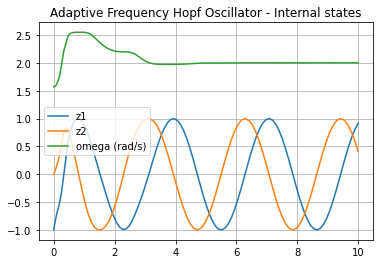

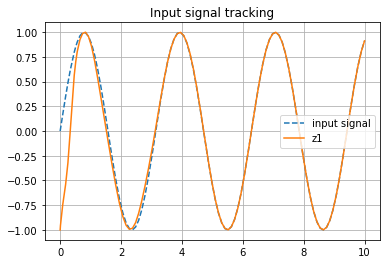

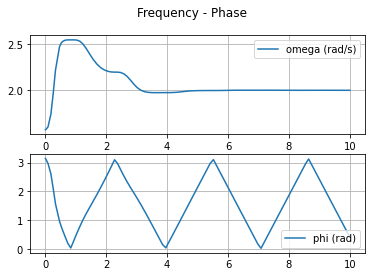

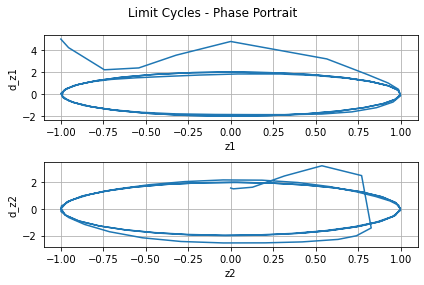

In [6]:
# Plot
plt.figure()
plt.plot(sol.t, sol.y.T)
plt.grid('on')
plt.title('Adaptive Frequency Hopf Oscillator - Internal states')
plt.legend(['z1', 'z2', 'omega (rad/s)'])

plt.figure()
plt.plot(sol.t, input_signal(sol.t), '--')
plt.plot(sol.t, sol.y[0,:].T)
plt.grid('on')
plt.title('Input signal tracking')
plt.legend(['input signal', 'z1'])

fig, axs = plt.subplots(2)
fig.suptitle('Frequency - Phase')
axs[0].plot(sol.t, sol.y[2,:].T)
axs[0].grid('on')
axs[0].legend(['omega (rad/s)'])
axs[1].plot(sol.t, compute_phase(sol.y[0,:], sol.y[1,:]).T)
axs[1].grid('on')
axs[1].legend(['phi (rad)'])

fig, axs = plt.subplots(2)
fig.suptitle('Limit Cycles - Phase Portrait')
d_z1, d_z2, d_omega = np.array_split(dz_dt(sol.t, sol.y, params), 3)
axs[0].plot(sol.y[0,:].T, d_z1 )
axs[0].grid('on')
axs[0].set_xlabel('z1')
axs[0].set_ylabel('d_z1')
axs[1].plot(sol.y[1,:].T, d_z2 )
axs[1].grid('on')
axs[1].set_xlabel('z2')
axs[1].set_ylabel('d_z2')
fig.tight_layout()